In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/credit_dataset.csv')
df1 = pd.read_csv('/content/heart.csv')

**Imbalance for credit_dataset**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
X = df.drop(columns=["Unnamed: 0", "ID", "TARGET"])
for column in X.select_dtypes(include=["object"]).columns:
    X[column] = label_encoder.fit_transform(X[column])

y = df["TARGET"]

# Check class distribution
print("Class Distribution:")
print(y.value_counts())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies and errors
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Results
print("\nResults:")
print("Train Accuracy:", train_accuracy)
print("Train Error:", train_error)
print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)

Class Distribution:
TARGET
0    24712
1      422
Name: count, dtype: int64

Results:
Train Accuracy: 0.998657184065251
Train Error: 0.0013428159347490531
Test Accuracy: 0.9814999005370997
Test Error: 0.01850009946290032


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Encode categorical variables
label_encoder = LabelEncoder()
X = df.drop(columns=["Unnamed: 0", "ID", "TARGET"])
for column in X.select_dtypes(include=["object"]).columns:
    X[column] = label_encoder.fit_transform(X[column])

y = df["TARGET"]

# Check class distribution
print("Class Distribution Before SMOTE:")
print(y.value_counts())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_train_smote.value_counts())

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predictions
train_predictions = model.predict(X_train_smote)
test_predictions = model.predict(X_test)

# Calculate accuracies and errors
train_accuracy = accuracy_score(y_train_smote, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Results
print("\nResults:")
print("Train Accuracy:", train_accuracy)
print("Train Error:", train_error)
print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)

Class Distribution Before SMOTE:
TARGET
0    24712
1      422
Name: count, dtype: int64

Class Distribution After SMOTE:
TARGET
0    19769
1    19769
Name: count, dtype: int64

Results:
Train Accuracy: 0.9989377307906318
Train Error: 0.0010622692093682495
Test Accuracy: 0.9795106425303362
Test Error: 0.02048935746966385


**Overfitting for heart dataset**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies and errors
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Results
print("Train Accuracy:", train_accuracy)
print("Train Error:", train_error)
print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)

Train Accuracy: 1.0
Train Error: 0.0
Test Accuracy: 0.8360655737704918
Test Error: 0.16393442622950816


**K Fold Cross Validation**

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation (k=5)
k = 5
cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Results
print(f"{k}-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

5-Fold Cross-Validation Scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean Accuracy: 0.8381967213114756
Standard Deviation: 0.02884314305637647


**Learning Curve**

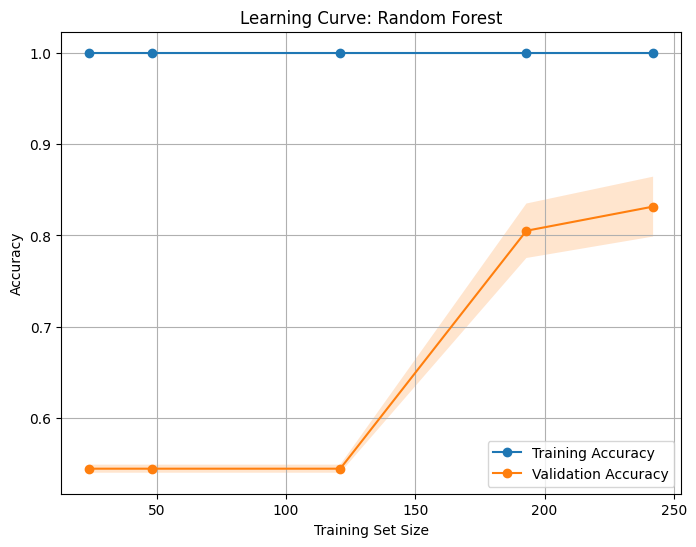

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=[0.1, 0.2, 0.5, 0.8, 1.0], random_state=42
)

# Calculate mean and standard deviation for training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
validation_mean = validation_scores.mean(axis=1)
validation_std = validation_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, validation_mean, label="Validation Accuracy", marker='o')

# Fill the area between the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2)

# Labels and legend
plt.title("Learning Curve: Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Selecting Important Features and then accuracy**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Train Random Forest to calculate feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select features with importance > 5% (threshold can be adjusted)
selected_features = feature_importance[feature_importance > 0.05].index
X_reduced = X[selected_features]

# Split reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with reduced features
reduced_model = RandomForestClassifier(random_state=42)
reduced_model.fit(X_train, y_train)

# Predictions
train_predictions = reduced_model.predict(X_train)
test_predictions = reduced_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Results
print("Selected Features:", selected_features.tolist())
print("Train Accuracy with Reduced Features:", train_accuracy)
print("Test Accuracy with Reduced Features:", test_accuracy)

Selected Features: ['cp', 'thalachh', 'caa', 'thall', 'oldpeak', 'age', 'chol', 'trtbps', 'exng', 'slp']
Train Accuracy with Reduced Features: 1.0
Test Accuracy with Reduced Features: 0.8360655737704918


**Regularization**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier with Regularization
model = RandomForestClassifier(
    random_state=42,
    max_depth=5,               # Limit the depth of trees
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples at a leaf node
    n_estimators=100           # Number of trees in the forest
)
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Results
print("Train Accuracy with Regularization:", train_accuracy)
print("Test Accuracy with Regularization:", test_accuracy)


Train Accuracy with Regularization: 0.9132231404958677
Test Accuracy with Regularization: 0.8360655737704918


**Early Stopping**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Early stopping logic
best_n_estimators = 0
best_val_accuracy = 0
train_accuracy_list = []
val_accuracy_list = []

for n_trees in range(10, 201, 10):  # Incrementally add trees
    model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate on training and validation sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    val_accuracy = accuracy_score(y_val, model.predict(X_val))

    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

    # Track the best number of trees
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_n_estimators = n_trees

# Train final model with the best number of trees
final_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, final_model.predict(X_test))

# Results
print(f"Best Number of Trees: {best_n_estimators}")
print(f"Validation Accuracy at Best: {best_val_accuracy}")
print(f"Test Accuracy with Early Stopping: {test_accuracy}")

Best Number of Trees: 170
Validation Accuracy at Best: 0.8222222222222222
Test Accuracy with Early Stopping: 0.8043478260869565


**Augmentation**

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features and target
X = df1.drop(columns=["output"])
y = df1["output"]

# Add random noise to the dataset to create augmented data
noise_level = 0.1  # Adjust noise level as needed
X_noisy = X + np.random.normal(0, noise_level, X.shape)

# Split augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier on the augmented dataset
model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Results
print("Train Accuracy with Noise Augmentation:", train_accuracy)
print("Test Accuracy with Noise Augmentation:", test_accuracy)

Train Accuracy with Noise Augmentation: 0.9338842975206612
Test Accuracy with Noise Augmentation: 0.819672131147541
